## **Diabetes Prediction using Machine Learning**

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### **Objective**

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

#### **Details about the dataset:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

**Variable Number: 9**

#### **1) Exploratory Data Analysis**

##### Importing all necessary libraries

In [73]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore")

In [74]:
#Reading the Dataset
df = pd.read_csv("D:\\Learning\\ML Projects\\Diabetes\\Datasets\\diabetes.csv")

In [75]:
#the first 5 observations
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
#Shape of the dataset
df.shape

(768, 9)

Shape of dataset is was examined. It consists of 768 observations and 9 varibles

In [77]:
#Feature Infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
#Descriptive Statistics of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
#Classes of the outcome varible 
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

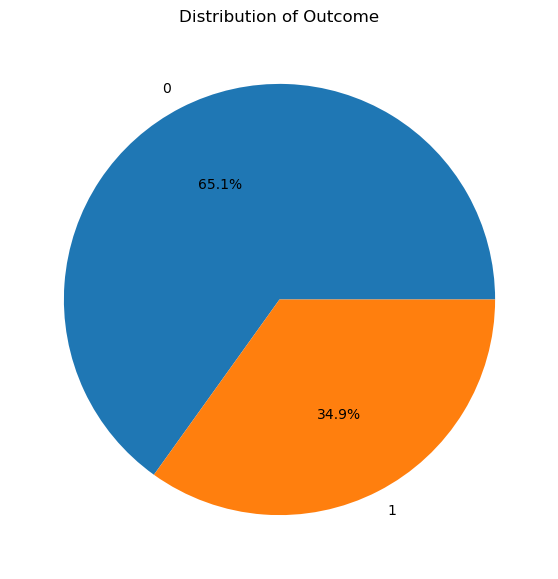

In [80]:
# The distribution of the outcome variable in the data was visualized.
fig = plt.figure(figsize=(7, 7))
plt.pie(df["Outcome"].value_counts(), labels=[0, 1], autopct='%1.1f%%')
plt.title("Distribution of Outcome")
plt.show()

In [81]:
#Correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


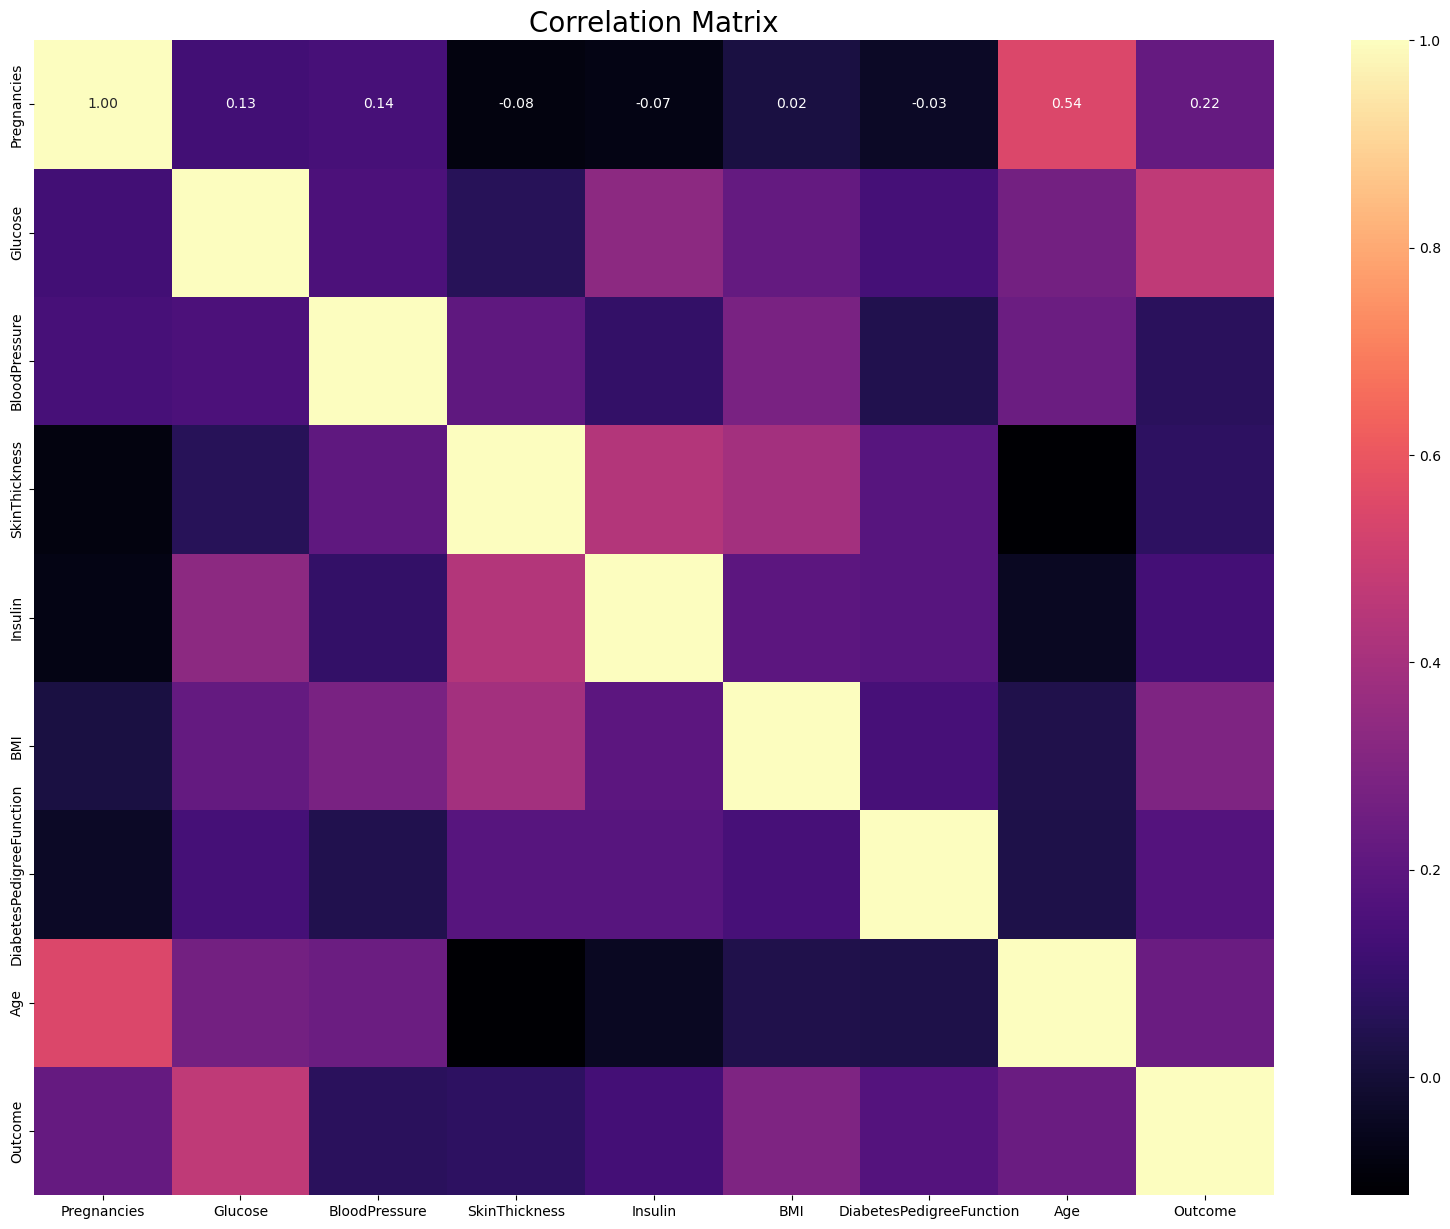

In [82]:
#Heatmap
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

- Accessing to the correlation of the dataset was provided. To know What kind of relationship is examined between the variables. 
- If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
- Correlation = 0 means no correlation.
- If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
- When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
- These variables are Glucose. As these increase, Outcome variable increases.

### **2) Data Preprocessing**

**2.1) Missing Observation Analysis**

In [83]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
#Checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**2.2) Outlier Observation Analysis**

In [85]:
columns=df.columns

In [86]:
#Checking for outliers
for feature in columns:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


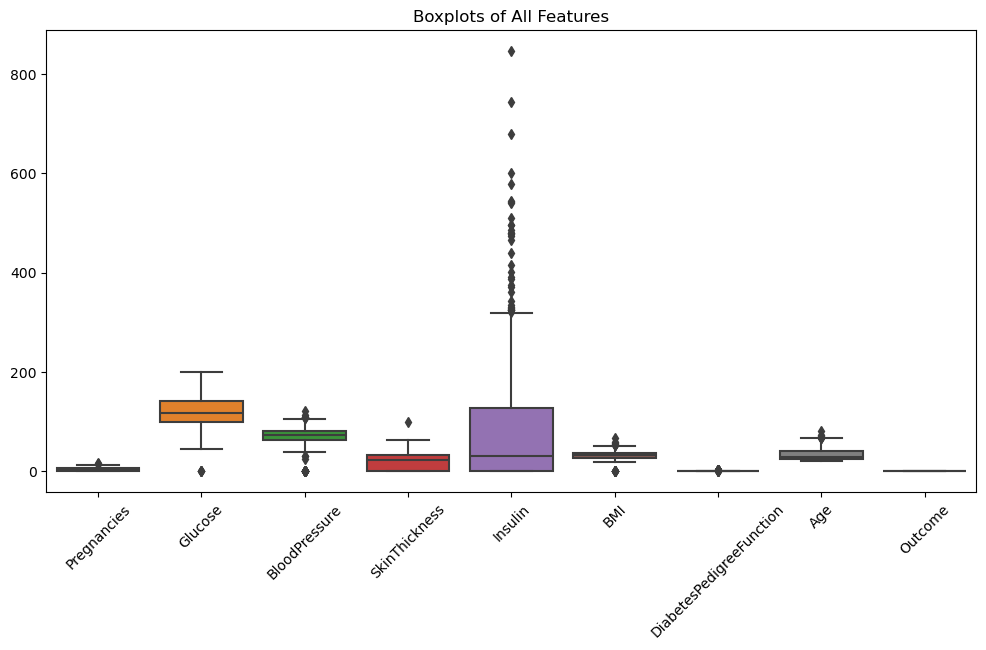

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplots of All Features')
plt.xticks(rotation=45)
plt.show()

From the boxplot above 
i can conclude that insulin have more outlies

In [88]:
# Cap noisy features
for feature in ['Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', "Insulin"]:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] > upper, upper,
                           np.where(df[feature] < lower, lower, df[feature]))



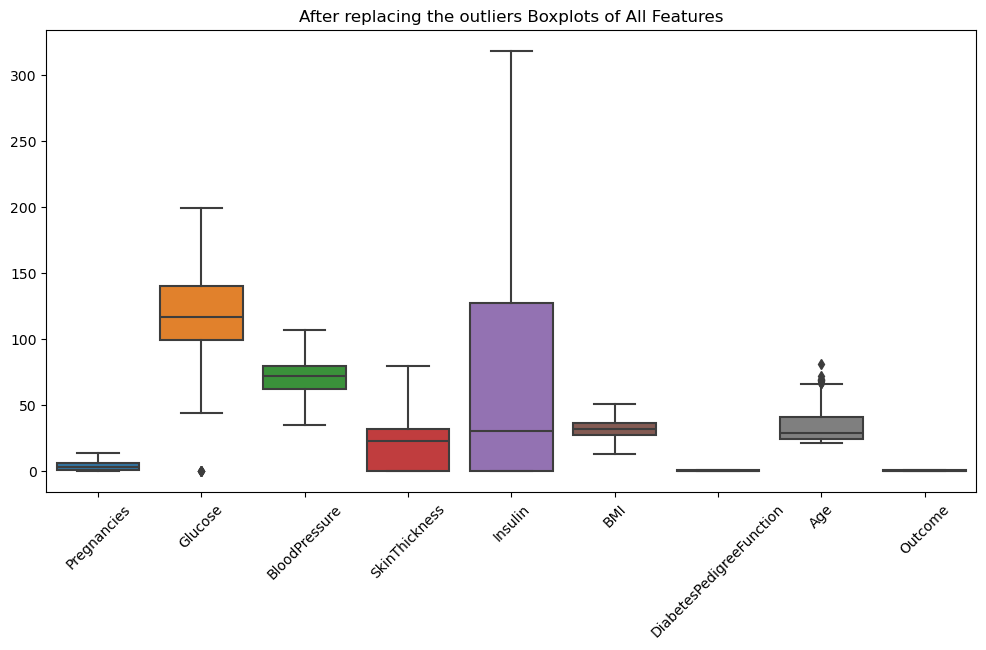

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('After replacing the outliers Boxplots of All Features')
plt.xticks(rotation=45)
plt.show()

#### **3) Feature Engineering**

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

According to BMI, some ranges were determined and categorical variables were assigned.

In [90]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [91]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1,Obesity 1
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0,Overweight
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1,Normal
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0.0,137,40.0,35.0,168.0,43.1,1.200,33,1,Obesity 3


categorical variable creation process is performed according to the insulin value.

In [92]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [93]:
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

In [94]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1,Obesity 1,Abnormal
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0,Overweight,Abnormal
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1,Normal,Abnormal
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0.0,137,40.0,35.0,168.0,43.1,1.200,33,1,Obesity 3,Abnormal


Some intervals were determined according to the glucose variable and these were assigned categorical variables.

In [95]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [96]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31,0,Overweight,Abnormal,Normal
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1.0,89,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0.0,137,40.0,35.0,168.0,43.1,1.200,33,1,Obesity 3,Abnormal,Secret


In [97]:
#droping the BMI, Glucose
df = df.drop(columns=["Glucose", "BMI", "NewInsulinScore"], axis=True)

##### **One Hot Encoding**

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [98]:
df.columns

Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI', 'NewGlucose'],
      dtype='object')

In [99]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = ['NewBMI', 'NewGlucose']

# Initialize the OneHotEncoder (note the parentheses)
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical data
encoded_data = one_hot_encoder.fit_transform(df[categorical_cols])

# Create a DataFrame for encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Combine encoded columns with original numeric data
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)



In [100]:
df_encoded.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,72.0,35.0,0.0,0.627,50,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,66.0,29.0,0.0,0.351,31,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,8.0,64.0,0.0,0.0,0.672,32,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,66.0,23.0,94.0,0.167,21,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,40.0,35.0,168.0,1.200,33,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Now i got the dataset which is clear and cleaned. So I am saving this to csv new file

In [101]:
# Save the final processed DataFrame to a new CSV file
df_encoded.to_csv('../Datasets/diabetes_processed_data.csv', index=False)


**Conclusion**
- Finally I created a clean dataset after performing all EDA and Feature Engineering